In [2]:
#importing all important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
#Extracting CSV Dataset file from the system using Pandas Library
data =pd.read_csv(r"C:\Users\asus\Desktop\Heart Disease Analysis Project\Heart Disease data\Heart Disease data.csv")

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
data.shape

(1025, 14)

In [6]:
#All the columns in the data set
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

There are thirteen features in Dataset
age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [7]:
target=data.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [8]:
#Converting Numerical Data into Categorical Data
def heart_disease(row):
  if row==0:
    return "Absence"
  elif row==1:
    return "Presence"

In [9]:
#Applying converted data into our dataset with new column - Heart_Disease
data["Heart_Disease"]=data["target"].apply(heart_disease)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Presence
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Absence
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Absence
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Presence


In [10]:
hd =  data.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

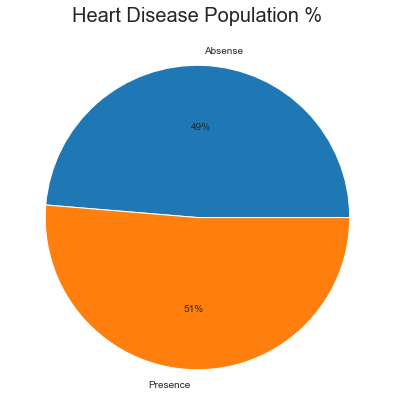

In [11]:
plt.figure(figsize=(10,7))
plt.pie(hd, labels=['Absense','Presence'],autopct='%0.0f%%')
plt.title('Heart Disease Population %',fontsize=20)
plt.show()

From the overall population, people having heart disease (51%) are more than those who have heart disease(49%)

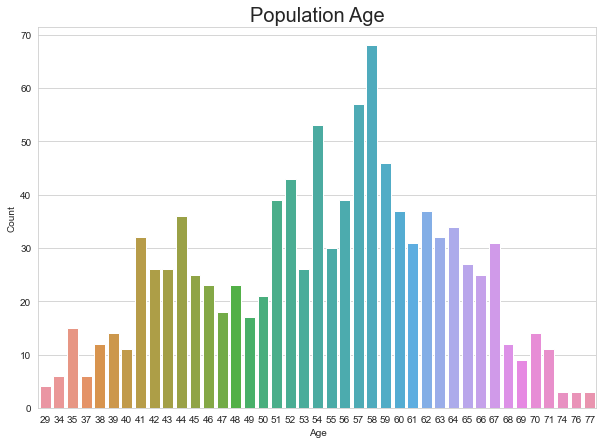

In [12]:
#Countplot Creation of Population Age using MatplotLib and Seaborn
plt.figure(figsize =(10,7))
sns.countplot(x="age", data=data)
plt.xlabel("Age",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title("Population Age",size=20)
plt.show()

-> In this section, the best analysis can be divided into the elderly,middle-aged, young people by looking at the age ranges.

In [13]:
#Statistical Analysis
min_age = data['age'].min()
max_age = data['age'].max()
mean_age = data['age'].mean()
print("Minimum_age =",min_age)
print("Maximum_age =",max_age)
print("Mean_age =",mean_age)

Minimum_age = 29
Maximum_age = 77
Mean_age = 54.43414634146342


In [14]:
#Categorical Analysis
Young_Ages = data[(data['age']>=29) & (data['age']<40)]
Middle_Ages = data[(data['age']>=40)&(data['age']<55)]
Elderly_Ages = data[(data['age']>55)]
print("Younge age =",len(Young_Ages))
print("Middle age =", len(Middle_Ages))
print("Elderly age =",len(Elderly_Ages))

Younge age = 57
Middle age = 419
Elderly age = 519


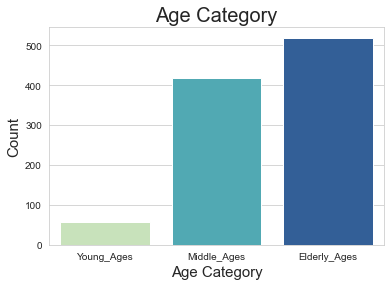

In [15]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn
sns.barplot(x=["Young_Ages","Middle_Ages","Elderly_Ages"], y=[len(Young_Ages),len(Middle_Ages),len(Elderly_Ages)],palette = 'YlGnBu')
plt.title("Age Category", fontsize = 20)
plt.xlabel("Age Category", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

We found in the data that people in elder age are more after than Middle age and in last Young age

In [16]:
def gender(row):
  if row==1:
    return 'Male'
  elif row==0:
    return "Female"

In [17]:
#Applying converted data into our dataset with new column - sex1
data["sex_1"] = data["sex"].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex_1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [18]:
#Converting Numerical Data into Categorical Data
def age_range(row):
  if row>=29 and row<40:
    return 'Young Age'
  elif row<55 and row>=40:
    return 'Middle Age'
  elif row>55:
    return 'Elder Age'

In [19]:
#Applying converted data into our dataset with new column - Age_Range
data['Age_Range'] = data['age'].apply(age_range)
data.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex_1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age


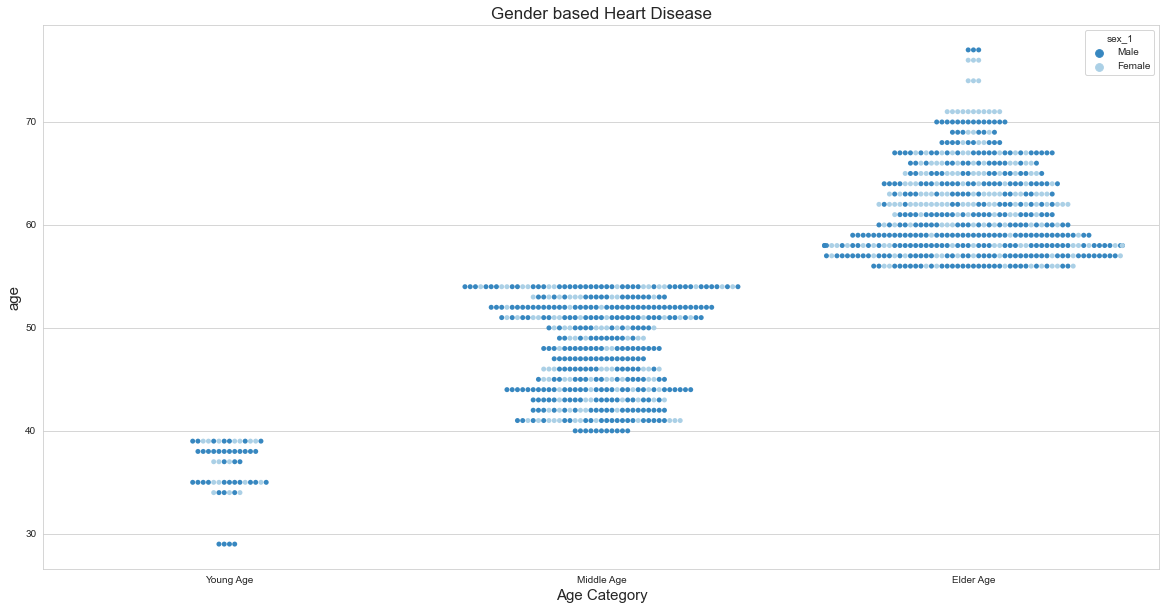

In [20]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn
plt.figure(figsize =(20,10))
sns.swarmplot(x='Age_Range',y='age', hue='sex_1', data=data, order=['Young Age','Middle Age','Elder Age'],palette='Blues_r')
plt.title('Gender based Heart Disease',fontsize=17)
plt.xlabel('Age Category',fontsize=15)
plt.ylabel('age',fontsize=15)
plt.show()


-> In Our Population Number Of Males are more in Middle Age Category and Females are more in Elder Age Category

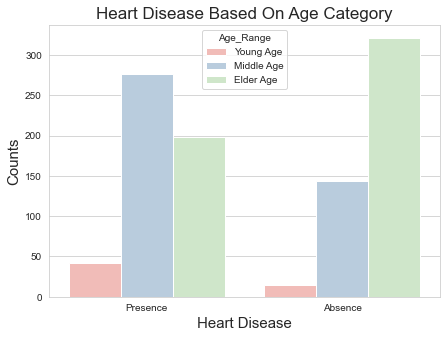

In [21]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

> Middle Age People are most affected by Heart Disease AND Young Age People are mostly FREE from any kind of Heart Disease

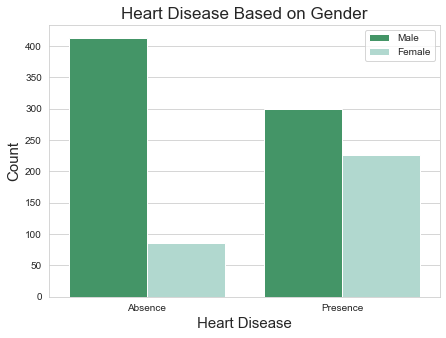

In [22]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='sex_1', data=data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

> We can see that Males are more prone to Heart Disease

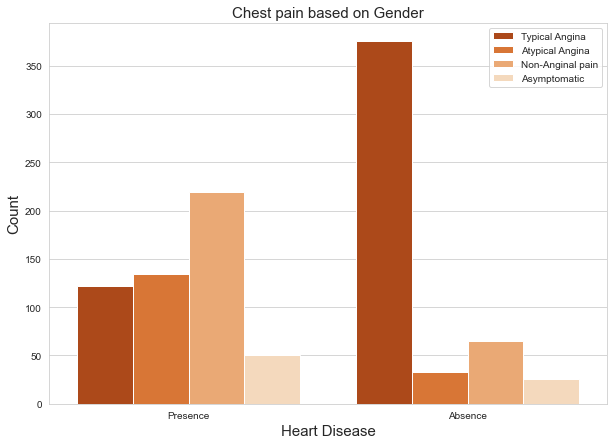

In [23]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn
plt.figure(figsize=(10,7))
sns.countplot(x=data['Heart_Disease'], hue='cp',data=data,order=['Presence','Absence'],palette='Oranges_r')
plt.title('Chest pain based on Gender',fontsize=15)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

-> It seems people having asymptomatic chest pain have a higher chance of heart disease

-> Asymptomatic Chest pain means neither causing nor exhibiting symptoms of Heart disease.

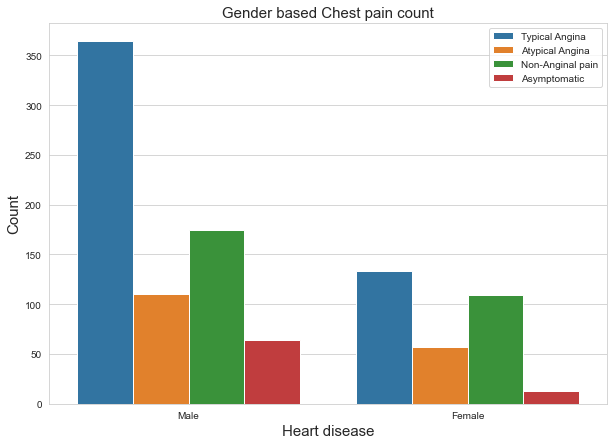

In [24]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn
plt.figure(figsize=(10,7))
sns.countplot(x=data['sex_1'], hue='cp', data=data)
plt.title('Gender based Chest pain count',fontsize=15)
plt.xlabel('Heart disease',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()
                     

> We can see that a higher number of men are suffering from typical Angina type of Chest Pain

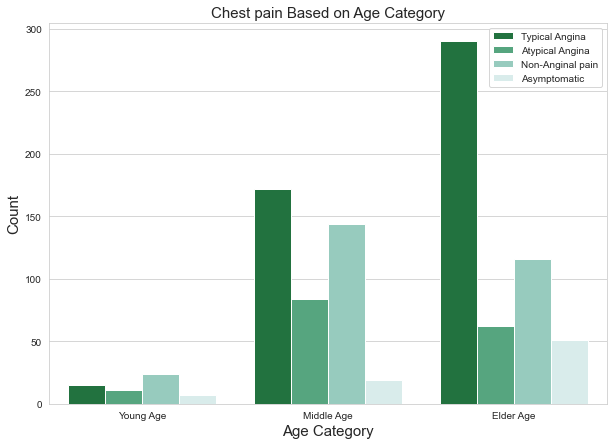

In [25]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn
plt.figure(figsize=(10,7))
sns.countplot(x=data['Age_Range'],hue='cp',data=data, order=['Young Age', 'Middle Age', 'Elder Age'],palette='BuGn_r')
plt.title('Chest pain Based on Age Category', fontsize=15)
plt.xlabel('Age Category',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

There is very high number of Typical Angina Pain in Elderly age Category

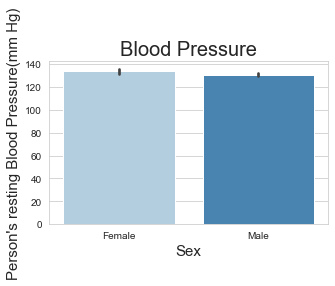

In [26]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) based on gender using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.barplot(x='sex_1',y='trestbps', order=['Female', 'Male'],data=data,palette='Blues')
plt.title('Blood Pressure',fontsize=20)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's resting Blood Pressure(mm Hg)",fontsize=15)
plt.show()

> Blood Pressure Rate is almost equal in Males and Females


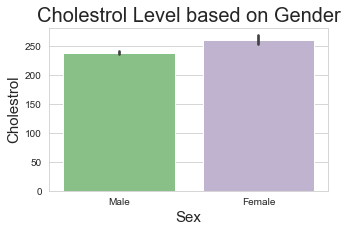

In [27]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.barplot(x='sex_1', y='chol',order=['Male','Female'],data=data,palette='Accent')
plt.title('Cholestrol Level based on Gender', fontsize=20)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Cholestrol',fontsize=15)
plt.show()

Female have little higher cholesterol compare to male

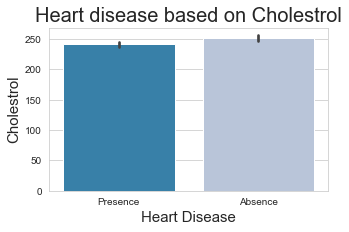

In [28]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.barplot(x='Heart_Disease', y='chol',data=data,order=['Presence','Absence'],palette='PuBu_r')
plt.title('Heart disease based on Cholestrol', fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

Lower the Cholestrol, Higher the chance of Heart Disease

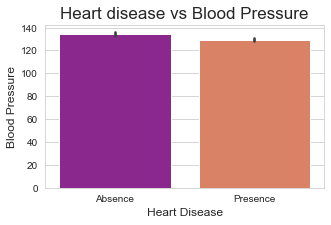

In [29]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.barplot(x='Heart_Disease', y='trestbps',data=data,palette='plasma')
plt.title('Heart disease vs Blood Pressure', fontsize=17)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Blood Pressure', fontsize= 12)
plt.show()

Higher blood Pressure results chance of Heart Disease

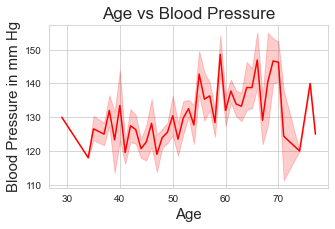

In [30]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.lineplot(x='age', y='trestbps',data=data, color='Red')
plt.title('Age vs Blood Pressure', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure in mm Hg',fontsize=15)
plt.show()

> Here we can observe that Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70

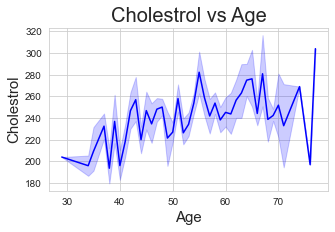

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex_1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age


In [31]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.lineplot(x='age',y='chol',data=data, color='Blue')
plt.title('Cholestrol vs Age', fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Cholestrol',fontsize=15)
plt.show()
data.head()

Similarly Cholestrol Increasing in the age group of 50-60

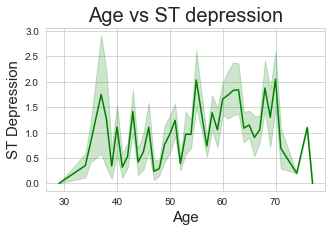

In [32]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.lineplot(x='age',y='oldpeak',data=data, color='Green')
plt.title('Age vs ST depression', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST Depression', fontsize=15)
plt.show()

> we can observe from here that ST depression mostly increases bw the age group of 30-40
-> ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

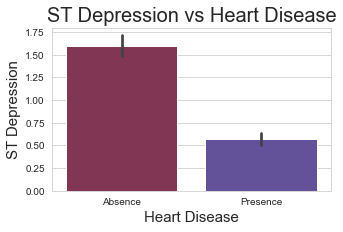

In [33]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.barplot(x='Heart_Disease',y='oldpeak', data=data, palette='twilight_r')
plt.title('ST Depression vs Heart Disease', fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('ST Depression', fontsize=15)
plt.show()

-> As per the data , Lower the ST Depression results Higher the Heart diseases

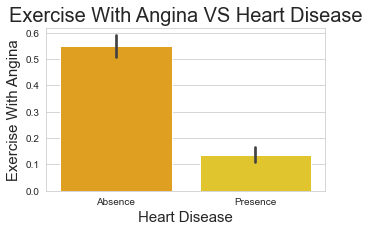

In [34]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.barplot(x='Heart_Disease', y='exang', data=data, palette='Wistia_r')
plt.title('Exercise With Angina VS Heart Disease', fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

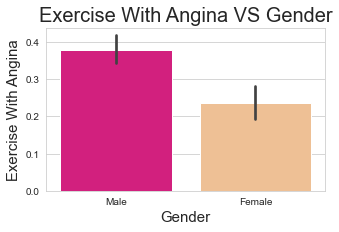

In [35]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.barplot(x='sex_1',y='exang', data=data, palette='Accent_r')
plt.title('Exercise With Angina VS Gender', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

-> Males have have high Exercise Angina

-> A type of chest pain caused by reduced blood flow to the heart.

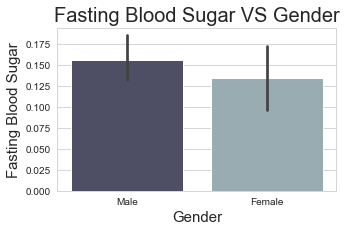

In [36]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn
plt.figure(figsize=(5,3))
sns.barplot(x='sex_1', y='fbs', data=data, palette='bone')
plt.title('Fasting Blood Sugar VS Gender', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

 Males have high no of Fasting Blood Sugar over 120

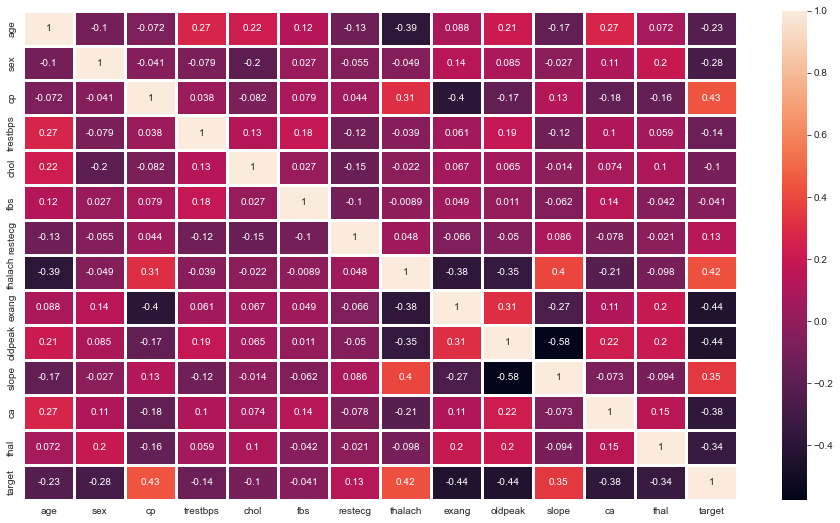

In [37]:
#Heatmap Creation using Seaborn
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot= True, linewidth=3)
plt.show()
